In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

from glob import glob

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import categorical_crossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.datasets import cifar10

In [17]:
os.getcwd()
data = glob('./data/kaggle/cat_dog/train/*.jpg')
# d = cv2.imread(data[0], cv2.IMREAD_UNCHANGED)
# d = plt.imread(data[0])
# d = cv2.resize(d, (150, 150))
# d[:,:,0]
# plt.imshow(d[:,:,:])
x = np.zeros((25000, 150, 150, 3), dtype=np.float32)
y = np.zeros(25000, dtype=np.int16)
for i, v in enumerate(data):
    value = cv2.imread(v, cv2.IMREAD_UNCHANGED)
    value = cv2.resize(value, (150, 150))
    x[i] = value
    if 'cat.' in v:
        y[i] = 0
    else:
        y[i] = 1

In [18]:
np.save('dog_cat_x.npy', x)
np.save('dog_cat_y.npy', y)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [34]:
input_shape = X_train.shape[1:]
input_layer = Conv2D(30, (5, 5), padding='valid', activation='relu', input_shape=input_shape)
mp_layer1 = MaxPooling2D((3, 3))
layer1 = Conv2D(100, (3, 3), padding='valid', activation='relu')
mp_layer2 = MaxPooling2D((3, 3))
flatten = Flatten()
layer2 = Dense(215, activation='relu')
out_layer = Dense(1, activation='sigmoid')



model = Sequential(
    [
        input_layer,
        BatchNormalization(),
        mp_layer1,
        layer1,
        mp_layer2,
        BatchNormalization(),
        flatten,
        layer2,
        BatchNormalization(),
        out_layer,
    ]
)
model.compile(optimizer=Adam(learning_rate=1e-5), loss=BinaryCrossentropy(), metrics=['accuracy'])
model.summary()
history = model.fit(X_train, Y_train, epochs=10)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 146, 146, 30)      2280      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 46, 46, 100)       27100     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 100)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 22500)             0         
_________________________________________________________________
dense_48 (Dense)             (None, 215)               4837715   
_________________________________________________________________
dense_49 (Dense)             (None, 1)               

In [37]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',
        input_shape=(150, 150, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss=BinaryCrossentropy(),
        optimizer=RMSprop(lr=1e-4),
        metrics=['acc'])

history2 = model2.fit(X_train, Y_train, epochs=10)

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
586/586 [==============================] - 27s 43ms/step - loss: 0.0011 - acc: 0.9997
Epoch 2/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 3/10
586/586 [==============================] - 24s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 4/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 5/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 6/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 7/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 8/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 9/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 1.0000
Epoch 10/10
586/586 [==============================] - 25s 42ms/step - loss: 2.6426e-29 - acc: 

In [ ]:
for i in X_test[:10]:
    result = np.where(model.predict(i.reshape(1,150,150,3))>0.5,"강아지","고양이")[0]
    print(result)
    plt.imshow(i.astype(np.int16))
    plt.show()

In [20]:
from tensorflow.keras.applications import VGG16

In [21]:
base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3))
# base.layers[0].get_weights()[0]
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

trans_x_train = base.predict(X_train)
trans_x_test = base.predict(X_test)
model.fit(trans_x_train, Y_train, epochs=30, batch_size=200, validation_data=(trans_x_test, Y_test))


Epoch 1/30
94/94 [==============================] - 4s 19ms/step - loss: 8.2965 - accuracy: 0.9230 - val_loss: 0.1995 - val_accuracy: 0.9418
Epoch 2/30
94/94 [==============================] - 1s 14ms/step - loss: 0.1830 - accuracy: 0.9580 - val_loss: 0.1913 - val_accuracy: 0.9635
Epoch 3/30
94/94 [==============================] - 1s 14ms/step - loss: 0.1005 - accuracy: 0.9764 - val_loss: 0.2255 - val_accuracy: 0.9584
Epoch 4/30
94/94 [==============================] - 1s 15ms/step - loss: 0.0954 - accuracy: 0.9834 - val_loss: 0.3327 - val_accuracy: 0.9587
Epoch 5/30
94/94 [==============================] - 1s 14ms/step - loss: 0.0312 - accuracy: 0.9935 - val_loss: 0.3431 - val_accuracy: 0.9586
Epoch 6/30
94/94 [==============================] - 1s 15ms/step - loss: 0.0251 - accuracy: 0.9947 - val_loss: 0.3399 - val_accuracy: 0.9613
Epoch 7/30
94/94 [==============================] - 1s 15ms/step - loss: 0.0173 - accuracy: 0.9967 - val_loss: 0.3340 - val_accuracy: 0.9648
Epoch 8/30
94

In [22]:
model.evaluate(trans_x_test, Y_test)

196/196 [==============================] - 2s 11ms/step - loss: 0.8724 - accuracy: 0.9669


[0.872399628162384, 0.9668800234794617]

array([['고양이']], dtype='<U3')

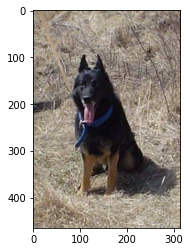

In [36]:
def dog_cat_predict(x):
    data = plt.imread(x)
    if data.shape[-1] >= 4:
        data = data[:, :, :3]
    plt.imshow(data)
    data = cv2.resize(data, (150, 150))
    data = base.predict(data.reshape(1, 150, 150, 3))
    result = np.where(model.predict(data) > 0.5, '강아지', '고양이')
    return result

dog_cat_predict('./data/kaggle/cat_dog/test/12.jpg')

In [46]:
v1 = np.dot(X_test[0:1], base.layers[1].get_weights()[0]) + base.layers[1].get_weights()[1]
v1.shape

(1, 150, 150, 3, 3, 64)

In [68]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

input_shape = X_train.shape[1:]

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',
        input_shape=input_shape))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
        optimizer=RMSprop(learning_rate=1e-4),
        metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, epochs=50, batch_size=500, validation_data=(X_test, Y_test))

Epoch 1/50
100/100 [==============================] - 4s 33ms/step - loss: 4.3361 - accuracy: 0.1894 - val_loss: 2.8988 - val_accuracy: 0.2472
Epoch 2/50
100/100 [==============================] - 3s 28ms/step - loss: 2.2482 - accuracy: 0.2877 - val_loss: 1.9119 - val_accuracy: 0.3393
Epoch 3/50
100/100 [==============================] - 3s 27ms/step - loss: 1.8233 - accuracy: 0.3665 - val_loss: 1.7372 - val_accuracy: 0.3861
Epoch 4/50
100/100 [==============================] - 3s 29ms/step - loss: 1.6261 - accuracy: 0.4228 - val_loss: 1.6234 - val_accuracy: 0.4242
Epoch 5/50
100/100 [==============================] - 3s 27ms/step - loss: 1.5060 - accuracy: 0.4668 - val_loss: 1.5526 - val_accuracy: 0.4504
Epoch 6/50
100/100 [==============================] - 3s 28ms/step - loss: 1.4198 - accuracy: 0.4974 - val_loss: 1.5206 - val_accuracy: 0.4666
Epoch 7/50
100/100 [==============================] - 3s 27ms/step - loss: 1.3556 - accuracy: 0.5230 - val_loss: 1.4370 - val_accuracy: 0.4969

In [73]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

input_shape = X_train.shape[1:]

base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=input_shape)
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

trans_x_train = base.predict(X_train)
trans_x_test = base.predict(X_test)
model.fit(trans_x_train, Y_train, epochs=100, batch_size=500, validation_data=(trans_x_test, Y_test))



Epoch 1/100
100/100 [==============================] - 4s 17ms/step - loss: 1.4620 - accuracy: 0.4948 - val_loss: 1.3033 - val_accuracy: 0.5549
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: 1.1909 - accuracy: 0.5816 - val_loss: 1.1349 - val_accuracy: 0.6135
Epoch 3/100
100/100 [==============================] - 1s 15ms/step - loss: 1.0989 - accuracy: 0.6151 - val_loss: 1.0927 - val_accuracy: 0.6198
Epoch 4/100
100/100 [==============================] - 1s 15ms/step - loss: 1.0469 - accuracy: 0.6314 - val_loss: 1.0729 - val_accuracy: 0.6334
Epoch 5/100
100/100 [==============================] - 1s 12ms/step - loss: 1.0020 - accuracy: 0.6493 - val_loss: 1.0585 - val_accuracy: 0.6338
Epoch 6/100
100/100 [==============================] - 2s 15ms/step - loss: 0.9702 - accuracy: 0.6570 - val_loss: 1.0437 - val_accuracy: 0.6395
Epoch 7/100
100/100 [==============================] - 1s 14ms/step - loss: 0.9306 - accuracy: 0.6729 - val_loss: 1.0429 - val_accuracy:

In [74]:
from tensorflow.keras.applications import VGG19
vgg19 = VGG19(include_top=False, input_shape=(32, 32, 3), classes=10)
trans_x1 = vgg19.predict(X_train)
trans_x2 = vgg19.predict(X_test)

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

model.fit(trans_x1, Y_train, epochs=100, batch_size=500, validation_data=(trans_x2, Y_test))


80142336/80134624 [==============================] - 7s 0us/step
Epoch 1/100
100/100 [==============================] - 4s 20ms/step - loss: 1.4889 - accuracy: 0.4859 - val_loss: 1.3560 - val_accuracy: 0.5519
Epoch 2/100
100/100 [==============================] - 2s 16ms/step - loss: 1.2237 - accuracy: 0.5706 - val_loss: 1.1803 - val_accuracy: 0.5967
Epoch 3/100
100/100 [==============================] - 2s 17ms/step - loss: 1.1379 - accuracy: 0.5968 - val_loss: 1.1185 - val_accuracy: 0.6162
Epoch 4/100
100/100 [==============================] - 2s 15ms/step - loss: 1.0827 - accuracy: 0.6190 - val_loss: 1.1137 - val_accuracy: 0.6191
Epoch 5/100
100/100 [==============================] - 2s 17ms/step - loss: 1.0400 - accuracy: 0.6354 - val_loss: 1.0903 - val_accuracy: 0.6245
Epoch 6/100
100/100 [==============================] - 2s 17ms/step - loss: 1.0037 - accuracy: 0.6468 - val_loss: 1.0818 - val_accuracy: 0.6264
Epoch 7/100
100/100 [==============================] - 2s 16ms/step - l

In [ ]:
# cv2.namedWindow('test')
# for i in data[:10]:
#     j = cv2.imread(i, cv2.IMREAD_UNCHANGED)
#     cv2.imshow('test', j)
#     time.sleep(3)
#     if (cv2.waitKey(1) & 0xFF) == ord('q'):
#         cv2.destroyAllWindows()
#         break